In [3]:
!pip install pyalex semanticscholar habanero

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pylalex (from versions: none)
ERROR: No matching distribution found for pylalex

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import pyalex
pyalex.config.email = "ly0@protonmail.com"
from habanero import counts

from semanticscholar import SemanticScholar
sch = SemanticScholar()

URL = "https://ost.ecosyste.ms/api/v1/projects/packages"
FILE_TO_SAVE_AS = "ecosystems_downloads.json" # the name you want to save file as


resp = requests.get(URL) # making requests to server

with open(FILE_TO_SAVE_AS, "wb") as f: # opening a file handler to create new file 
    f.write(resp.content) # writing content to file

In [5]:
df = pd.read_json(resp.content.decode())

In [6]:
df.head(30)

,id,name,description,url,last_synced_at,repository,owner,packages,commits,issues_stats,events,keywords,dependencies,score,created_at,updated_at,avatar_url,language,category,sub_category,monthly_downloads,readme,funding_links,readme_doi_urls,works,project_url,html_url
0,9458,xarray,An open source project and Python package that...,https://github.com/pydata/xarray,2024-05-12 07:02:47.527000+00:00,"{'uuid': '13221727', 'full_name': 'pydata/xarr...","{'login': 'pydata', 'name': 'Python for Data',...","[{'name': 'xarray', 'ecosystem': 'conda', 'des...","{'full_name': 'pydata/xarray', 'default_branch...","{'full_name': 'pydata/xarray', 'html_url': 'ht...","{'total': {'ForkEvent': 1210, 'CreateEvent': 3...","[dask, netcdf, numpy, pandas, python, xarray]","[{'ecosystem': 'actions', 'filepath': '.github...",31.684944,2023-09-11 14:36:19.560000+00:00,2024-05-12 07:02:47.547000+00:00,https://github.com/pydata.png,Python,Climate Change,Climate Data Standards,5197430,# xarray: N-D labeled arrays and datasets\n\n[...,"[https://github.com/sponsors/numfocus, http://...",[https://doi.org/10.5281/zenodo.598201],{},https://ost.ecosyste.ms/api/v1/projects/9458,https://ost.ecosyste.ms/projects/9458
1,20618,netcdf-python,The Unidata network Common Data Form (netCDF) ...,https://github.com/Unidata/netcdf4-python,2024-05-12 08:06:00.962000+00:00,"{'uuid': '15884459', 'full_name': 'Unidata/net...","{'login': 'Unidata', 'name': 'NSF Unidata', 'u...","[{'name': 'py-netcdf4', 'ecosystem': 'spack', ...","{'full_name': 'Unidata/netcdf4-python', 'defau...","{'full_name': 'Unidata/netcdf4-python', 'html_...","{'total': {'CreateEvent': 305, 'CommitCommentE...","[netcdf, netcdf4, python]","[{'ecosystem': 'actions', 'filepath': '.github...",25.919311,2023-09-11 14:52:14.006000+00:00,2024-05-12 08:06:01.001000+00:00,https://github.com/Unidata.png,Cython,Climate Change,Climate Data Standards,2505017,To update web docs at http://github.unidata.io...,[],[],{},https://ost.ecosyste.ms/api/v1/projects/20618,https://ost.ecosyste.ms/projects/20618
2,903,h5netcdf,A Python interface for the netCDF4 file format...,https://github.com/h5netcdf/h5netcdf,2024-05-12 08:06:07.149000+00:00,"{'uuid': '33561533', 'full_name': 'h5netcdf/h5...","{'login': 'h5netcdf', 'name': 'h5netcdf', 'uui...","[{'name': 'h5netcdf', 'ecosystem': 'conda', 'd...","{'full_name': 'h5netcdf/h5netcdf', 'default_br...","{'full_name': 'h5netcdf/h5netcdf', 'html_url':...","{'total': {'ForkEvent': 13, 'CreateEvent': 27,...","[h5py, hdf5, netcdf, python]","[{'ecosystem': 'actions', 'filepath': '.github...",21.791607,2023-09-11 11:54:36.292000+00:00,2024-05-12 08:06:07.179000+00:00,https://github.com/h5netcdf.png,Python,Climate Change,Climate Data Standards,543711,h5netcdf\n========\n\n.. image:: https://githu...,[],[],{},https://ost.ecosyste.ms/api/v1/projects/903,https://ost.ecosyste.ms/projects/903
3,19753,pvlib-python,A set of documented functions for simulating t...,https://github.com/pvlib/pvlib-python,2024-05-12 06:35:52.245000+00:00,"{'uuid': '30895522', 'full_name': 'pvlib/pvlib...","{'login': 'pvlib', 'name': 'pvlib', 'uuid': '1...","[{'name': 'pvlib', 'ecosystem': 'pypi', 'descr...","{'full_name': 'pvlib/pvlib-python', 'default_b...","{'full_name': 'pvlib/pvlib-python', 'html_url'...","{'total': {'CreateEvent': 77, 'CommitCommentEv...","[photovoltaic, python, renewable-energy, renew...","[{'ecosystem': 'actions', 'filepath': '.github...",25.278561,2023-09-11 14:52:06.879000+00:00,2024-05-12 06:35:52.260000+00:00,https://github.com/pvlib.png,Python,Renewable Energy,Photovoltaics and Solar Energy,348753,"<img src=""docs/sphinx/source/_images/pvlib_log...",[],"[https://doi.org/10.5281/zenodo.593284, https:...",{'https://doi.org/10.5281/zenodo.593284': None...,https://ost.ecosyste.ms/api/v1/projects/19753,https://ost.ecosyste.ms/projects/19753
4,271,entsoe-py,A Python client for the ENTSO-E API (European ...,https://github.com/EnergieID/entsoe-py,2024-05-13 01:01:16.701000+00:00,"{'uuid': '97010217', 'f

In [7]:
df.iloc[2]["packages"][0] # GO packages do not provide montly download numbers. That's why we had to kick out kube-green

{'name': 'h5netcdf',
 'ecosystem': 'conda',
 'description': None,
 'homepage': 'https://github.com/h5netcdf/h5netcdf',
 'licenses': 'BSD-3-Clause',
 'normalized_licenses': ['BSD-3-Clause'],
 'repository_url': 'https://github.com/h5netcdf/h5netcdf',
 'keywords_array': [],
 'namespace': None,
 'versions_count': 30,
 'first_release_published_at': '2022-10-03T15:44:30.409Z',
 'latest_release_published_at': '2022-08-02T14:42:49.000Z',
 'latest_release_number': '1.0.2',
 'last_synced_at': '2024-05-11T07:35:56.859Z',
 'created_at': '2022-10-03T15:44:30.395Z',
 'updated_at': '2024-05-11T07:35:56.860Z',
 'registry_url': 'https://anaconda.org/conda-forge/h5netcdf',
 'install_command': 'conda install -c conda-forge h5netcdf',
 'documentation_url': None,
 'metadata': {},
 'repo_metadata': {'uuid': '33561533',
  'full_name': 'h5netcdf/h5netcdf',
  'owner': 'h5netcdf',
  'description': 'Pythonic interface to netCDF4 via h5py',
  'archived': False,
  'fork': False,
  'pushed_at': '2023-06-02T05:40:02

In [8]:
names = []
download_counts = []
url = []
description = []
category = []
sub_category = []
language = []
docker_downloads = []
doi = []
citations = []

for index, row in df.iterrows():
    names.append(row['name'])
    package_downloads = 0
    docker_download_count = 0
    for package_manager in range(len(row['packages'])):
        if row['packages'][package_manager]['downloads']:
            if row['packages'][package_manager]['downloads_period'] == "last-month":
                package_downloads += row['packages'][package_manager]['downloads']
        if row['packages'][package_manager]['docker_downloads_count']:
            docker_download_count = row['packages'][package_manager]['docker_downloads_count']
        else:
            docker_download_count = 0
    download_counts.append(package_downloads)
    docker_downloads.append(docker_download_count)
    url.append(row['url'])
    description.append(row['description'])
    category.append(row['category'])
    sub_category.append(row['sub_category'])
    language.append(row['language'])
    if row['readme_doi_urls']:
        doi_split = row['readme_doi_urls'][0].rsplit('/')
        doi = doi_split[-2] +"/"+ doi_split[-1]
        print(doi)
        try:
            cites = counts.citation_count(doi = doi) 
            citations.append(cites)
            print("Citations found via crossref:",cites)
        except:
            citations.append(None)
            print("Not found via Crossref")
        try:
            paper = sch.get_paper(doi)
            print("Citations found via Semantic Scholar",paper.citationCount)
        except:
            print("Not found via Semantic Scholar")

        try:
            paper = sch.get_paper(doi)
            print("Citations found via OpenAlex: ",Works()[row['readme_doi_urls'][0]]["cited_by_count"])
        except:
            print("Not found via OpenAlex")

    else:
        citations.append(None)
        print("no DOI found")


10.5281/zenodo.598201
Not found via Crossref


Not found via Semantic Scholar
Not found via OpenAlex
no DOI found
no DOI found
10.5281/zenodo.593284
Not found via Crossref
Not found via Semantic Scholar
Not found via OpenAlex
no DOI found
no DOI found
no DOI found
no DOI found
no DOI found
no DOI found
no DOI found
no DOI found
no DOI found
no DOI found
no DOI found
no DOI found
no DOI found
10.5281/zenodo.3960218
Not found via Crossref
Citations found via Semantic Scholar 1
Citations found via OpenAlex:  6
10.5281/zenodo.3491062
Not found via Crossref
Not found via Semantic Scholar
Not found via OpenAlex
no DOI found
no DOI found
no DOI found
10.21105/joss.03414
Not found via Crossref
Citations found via Semantic Scholar 7
Citations found via OpenAlex:  5
10.5281/zenodo.5173152
Not found via Crossref
Not found via Semantic Scholar
Not found via OpenAlex
10.5281/zenodo.595961
Not found via Crossref
Not found via Semantic Scholar
Not found via OpenAlex
no DOI found
no DOI found
10.21105/joss.05415
Not found via Crossref
Citations fo

In [ ]:
print(pyalex.Works()["https://doi.org/10.7717/peerj.4375"]["cited_by_count"])

717


In [ ]:
df_extract = pd.DataFrame()
df_extract['project_names'] = names
df_extract['download_counts'] = download_counts
df_extract['git_url'] = url
df_extract['description'] = description
df_extract['category'] = category
df_extract['sub_category'] = sub_category
df_extract['language'] = language
df_extract['docker_downloads'] = docker_downloads
df_extract['citations'] = citations
df_extract.head(200)


,project_names,download_counts,git_url,description,category,sub_category,language,docker_downloads,citations
0,xarray,5134496,https://github.com/pydata/xarray,An open source project and Python package that...,Climate Change,Climate Data Standards,Python,0,0.0
1,netcdf-python,2462594,https://github.com/Unidata/netcdf4-python,The Unidata network Common Data Form (netCDF) ...,Climate Change,Climate Data Standards,Cython,0,NaN
2,h5netcdf,518996,https://github.com/h5netcdf/h5netcdf,A Python interface for the netCDF4 file format...,Climate Change,Climate Data Standards,Python,0,NaN
3,pvlib-python,344401,https://github.com/pvlib/pvlib-python,A set of documented functions for simulating t...,Renewable Energy,Photovoltaics and Solar Energy,Python,0,0.0
4,entsoe-py,276360,https://github.com/EnergieID/entsoe-py,A Python client for the ENTSO-E API (European ...,Energy Systems,Energy System Data Access,Python,0,NaN
5,Meteostat Python,153104,https://github.com/meteostat/meteostat-python,Access and analyze historical weather and clim...,Climate Change,Climate Data Access and Visualization,Python,6,NaN
6,eeweather,133371,https://github.com/openeemeter/eeweather,"Fetch NCDC ISD, TMY3, or CZ2010 weather data t...",Atmosphere,Meteorological Observation and Forecast,HTML,0,NaN
7,cfgrib,131184,https://github.com/ecmwf/cfgrib,A Python interface to map GRIB files to the Ne...,Climate Change,Climate Data Processing and Analysis,Python,0,NaN
8,origin,123699,https://github.com/energywebfoundation/origin,A set of toolkits that together provide a syst...,Energy Systems,Energy Distribution and Grids,TypeScript,0,NaN
9,ocpp,78193,https://github.com/mobilityhouse/ocpp,Python implementation of the Open Charge Point...,Consumption,Mobility and Transportation,Python,14,NaN


In [ ]:
df_extract.loc[df['language'] == 'Julia']

,project_names,download_counts,git_url,description,category,sub_category,language,docker_downloads,citations
334,Ribasim,360,https://github.com/Deltares/Ribasim,"A water resources model, designed to be the re...",Natural Resources,Water Supply,Julia,0,NaN
620,ClimateBase.jl,0,https://github.com/juliaclimate/climatebase.jl,A Julia package offering basic functionality f...,Climate Change,Climate Data Processing and Analysis,Julia,0,NaN
623,AIBECS.jl,0,https://github.com/juliaocean/aibecs.jl,A Julia package that provides ocean biogeochem...,Hydrosphere,Ocean Carbon and Temperature,Julia,0,3.0
625,vSmartMOM.jl,0,https://github.com/RemoteSensingTools/vSmartMO...,A full end-to-end modular software suite for r...,Atmosphere,Radiative Transfer,Julia,0,2.0
627,GasModels.jl,0,https://github.com/lanl-ansi/GasModels.jl,A Julia/JuMP Package for Gas Network Optimizat...,Energy Storage,Hydrogen,Julia,0,NaN
633,HydroPowerSimulations.jl,0,https://github.com/NREL-Sienna/HydroPowerSimul...,Contains extensions on PowerSystems.jl and Pow...,Renewable Energy,Hydro Energy,Julia,0,NaN
637,Cropbox.jl,0,https://github.com/cropbox/cropbox.jl,Provides a domain specific language for develo...,Consumption,Agriculture and Nutrition,Julia,0,NaN
641,ClimateMARGO.jl,0,https://github.com/climatemargo/climatemargo.jl,"A Julia implementation of MARGO, an idealized ...",Emissions,Carbon Capture,Julia,0,NaN
644,Oceananigans.jl,0,https://github.com/clima/oceananigans.jl,Fast and friendly fluid dynamics on CPUs and G...,Hydrosphere,Ocean Circulation Models,Julia,0,25.0
657,Diversity.jl,0,https://github.com/ecojulia/diversity.jl,"Provides functionality for measuring alpha, be...",Biosphere,Biodiversity and Species Distribution,Julia,0,3186.0


In [ ]:
import textwrap

def text_to_link(project_name, git_url):
    return '<a href="' + git_url + '" target="_blank" style = "color: black">' + str(project_name) + "</a>"

def text_to_bolt(topic):
    return "<b>" + topic + "</b>"

def line_break_text(text):
    wrapped_text = '<br>'.join(textwrap.wrap(text, 64))
    return wrapped_text
                               
df_extract["description"] = df_extract.apply(
    lambda x: line_break_text(x.description), axis=1
)                             
                               
                               
df_extract["project_names"] = df_extract.apply(
    lambda x: text_to_link(x.project_names, x.git_url), axis=1
)
df_extract

,project_names,download_counts,git_url,description,category,sub_category,language,docker_downloads,citations
0,"<a href=""https://github.com/pydata/xarray"" tar...",5134496,https://github.com/pydata/xarray,An open source project and Python package that...,Climate Change,Climate Data Standards,Python,0,0.0
1,"<a href=""https://github.com/Unidata/netcdf4-py...",2462594,https://github.com/Unidata/netcdf4-python,The Unidata network Common Data Form (netCDF) ...,Climate Change,Climate Data Standards,Cython,0,NaN
2,"<a href=""https://github.com/h5netcdf/h5netcdf""...",518996,https://github.com/h5netcdf/h5netcdf,A Python interface for the netCDF4 file format...,Climate Change,Climate Data Standards,Python,0,NaN
3,"<a href=""https://github.com/pvlib/pvlib-python...",344401,https://github.com/pvlib/pvlib-python,A set of documented functions for simulating t...,Renewable Energy,Photovoltaics and Solar Energy,Python,0,0.0
4,"<a href=""https://github.com/EnergieID/entsoe-p...",276360,https://github.com/EnergieID/entsoe-py,A Python client for the ENTSO-E API (European ...,Energy Systems,Energy System Data Access,Python,0,NaN
...,...,...,...,...,...,...,...,...,...
802,"<a href=""https://github.com/SmartTensors/GeoTh...",0,https://github.com/SmartTensors/GeoThermalClou...,A repository containing all the data and codes...,Renewable Energy,Geothermal Energy,Jupyter Notebook,0,NaN
803,"<a href=""https://github.com/LBNL-UCB-STI/beam""...",0,https://github.com/LBNL-UCB-STI/beam,"The Framework for Modeling Behavior, Energy, A...",Consumption,Mobility and Transportation,Jupyter Notebook,0,NaN
804,"<a href=""https://github.com/NREL/OpenStudio-HP...",0,https://github.com/NREL/OpenStudio-HPXML,Modeling of residential buildings in EnergyPlu...,Consumption,Buildings and Heating,Ruby,0,NaN
805,"<a href=""https://github.com/ecojulia/ecosistem...",0,https://github.com/ecojulia/ecosistem.jl,A Julia package that provides functionality fo...,Biosphere,Conservation and Restoration,Julia,0,NaN


In [ ]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

#df_extract = df_extract[df_extract["category"] == "Renewable Energy"]

number_of_projects_to_show = 300
top_downloaders = df_extract.nlargest(number_of_projects_to_show, "download_counts")
top_downloaders.index.name = "ranking"
color_discrete_sequence = px.colors.qualitative.Vivid
fig = px.bar(
    top_downloaders,
    x=top_downloaders["download_counts"],
    y=top_downloaders["project_names"],
    custom_data=["project_names", "download_counts", "docker_downloads", "git_url", "description","category","sub_category","language",top_downloaders.index+1],
    orientation="h",
    color = 'category',
    color_discrete_sequence=color_discrete_sequence,
)

fig.update_layout(
    height=number_of_projects_to_show*20,  # Added parameter
    #width=700,
    xaxis_title="",
    yaxis_title=None,
    title="Package downloads in the last month",
    dragmode=False,
)

fig.add_layout_image(
    dict(
        source=logo_img,
        xref="paper",
        yref="paper",
        x=1,
        y=0,
        sizex=0.10,
        sizey=0.10,
        xanchor="right",
        yanchor="bottom",
    )
)
fig.update_layout(hovermode="y unified",hoverdistance=1000) 

fig.update_traces(
    hovertemplate="<extra></extra>"+"<br>".join(
        [   
            "Ranking: <b>%{customdata[8]}</b>",
            "Description: <b>%{customdata[4]}</b>",
            "Sub Category: <b>%{customdata[6]}</b>",
            "Language: <b>%{customdata[7]}</b>",
            "Downloads per month: <b>%{customdata[1]}</b>",
            #"Docker Downloads: <b>%{customdata[2]}</b>",
            "Category: <b>%{customdata[5]}</b>",

        ]
    )
                  
)

#fig.update(layout_showlegend=False)

fig.update_layout(modebar=dict(bgcolor="rgba(0,0,0,0)"))

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
  },
  'responsive':'true'
}
fig.update_layout(
    plot_bgcolor='white'
)

fig.update_layout(modebar_color="#009485", modebar_activecolor="#2563eb")
fig["layout"]["yaxis"]["autorange"] = "reversed"

fig.update_xaxes(showspikes=False)  # <-- add this line
fig.update_yaxes(showspikes=False)  # <-- add this line
#fig.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
#                  plot_bgcolor = "rgba(0,0,0,0)")

#fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})
fig.update_layout(xaxis_type = "log",yaxis_categoryorder = 'total descending',legend_title=None, xaxis={'side': 'top'}, )
fig.show(config=config)

pio.write_json(fig,"download_plot.json")
pio.write_html(fig,"download_plot.html")


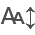

project_names  download_counts                                            git_url                                        description                 category                             sub_category          language  docker_downloads  citations
22   <a href="https://github.com/opengeos/leafmap" ...            28281                https://github.com/opengeos/leafmap  A Python package for geospatial analysis and i...  Sustainable Development             Data Catalogs and Interfaces            Python                11        6.0
27   <a href="https://github.com/ouranosinc/xclim" ...            19951                https://github.com/ouranosinc/xclim  A library of derived climate variables, i.e. c...           Climate Change     Climate Data Processing and Analysis            Python                 0        9.0
28   <a href="https://github.com/pybamm-team/pybamm...            18705              https://github.com/pybamm-team/pybamm  Fast and flexible physics-based battery models...           Energy Storage                                  Battery            Python                 0      129.0
34   <a href="https://github.com/scikit-maad/scikit...            10063         https://github.com/scikit-maad/scikit-maad  Enables quantitative analysis of environmental...                Biosphere    Biodiversity and Species Distribution            Python                16       38.0
35   <a href="https://github.com/CenterForTheBuiltE...             9743  https://github.com/CenterForTheBuiltEnvironmen...  Package to calculate several thermal comfort i...              Consumption                    Buildings and Heating            Python                 0       73.0
49   <a href="https://github.com/ECSHackWeek/impeda...             6287        https://github.com/ECSHackWeek/impedance.py  A Python package for working with electro-chem...           Energy Storage                                  Battery            Python                 0       90.0
60   <a href="https://github.com/ropengov/eurostat"...             4897               https://github.com/ropengov/eurostat  R tools to access open data from Eurostat, the...  Sustainable Development             Data Catalogs and Interfaces                 R                15       36.0
64   <a href="https://github.com/modflowpy/flopy" t...             4449                 https://github.com/modflowpy/flopy  A Python package to create, run, and post-proc...        Natural Resources                             Water Supply            Python                 0        6.0
67   <a href="https://github.com/pypsa/atlite" targ...             4036                    https://github.com/pypsa/atlite  Light-weight version of Aarhus RE Atlas for co...           Energy Systems                Energy System Data Access            Python                 0       41.0
69   <a href="https://github.com/pyswmm/pyswmm" tar...             3987                   https://github.com/pyswmm/pyswmm    Python Wrapper for Stormwater Management Model.        Natural Resources                             Water Supply            Python                 6       72.0
70   <a href="https://github.com/hyriver/pydaymet" ...             3957                https://github.com/hyriver/pydaymet  Retrieving and post-processing climate data fr...              Hydrosphere          Ocean and Hydrology Data Access            Python                 0      119.0
73   <a href="https://github.com/ropensci/rotl" tar...             3526                   https://github.com/ropensci/rotl  An R package to interact with the Open Tree of...                Biosphere    Biodiversity and Species Distribution                 R                11      274.0
74   <a href="https://github.com/blaylockbk/Herbie"...             3520               https://github.com/blaylockbk/Herbie  A python package that downloads recent and arc...               Atmosphere  Meteorological Observation and Forecast            Python                 0       70.0
76   <a href="https://g

In [ ]:
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)
df_extract.loc[df_extract['citations'] > 0]